In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
train_ori = pd.read_csv("train.csv")
train = pd.read_csv("train2.csv")
test = pd.read_csv("test2.csv")
age_gender = pd.read_csv("age_gender_info.csv")

In [3]:
# 원데이터 남기기 
train1 = train
test1 = test

In [4]:
train1

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,공급유형,등록차량수
0,246,545,0,2,33.48,276,17.0,14,9216000.0,82940.0,0.0,3.0,624.0,국민임대,205.0
1,246,545,0,2,39.60,60,17.0,14,12672000.0,107130.0,0.0,3.0,624.0,국민임대,205.0
2,246,545,0,2,39.60,20,17.0,14,12672000.0,107130.0,0.0,3.0,624.0,국민임대,205.0
3,246,545,0,2,46.90,38,17.0,14,18433000.0,149760.0,0.0,3.0,624.0,국민임대,205.0
4,246,545,0,2,46.90,19,17.0,14,18433000.0,149760.0,0.0,3.0,624.0,국민임대,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,57,697,1,7,31.84,1,0.0,1,7854182.0,166698.5,0.0,4.0,128.0,임대상가,86.0
2545,57,697,1,7,63.68,1,0.0,1,35836620.0,218783.5,0.0,4.0,128.0,임대상가,86.0
2546,57,697,1,7,137.49,1,0.0,1,48819160.0,263131.5,0.0,4.0,128.0,임대상가,86.0
2547,63,481,1,2,31.84,1,5.0,1,7925370.0,150289.3,0.0,1.0,65.0,임대상가,62.0


---

### 파생변수생성 (age_gender)

생산가능인구: 15세~64세  -> 10대의 비율은 한자리로 적고, 60대의 경제활동인구 비율이 증가하는 추세를 감안하여, 20대 ~ 60대를 묶어서 변수생성 

In [5]:
age_gender['자녀'] = age_gender['10대미만(여자)'] + age_gender['10대미만(남자)'] + age_gender['10대(여자)'] + age_gender['10대(남자)']
age_gender['생산가능인구'] = (age_gender['20대(여자)'] + age_gender['20대(남자)'] + age_gender['30대(여자)'] + age_gender['30대(남자)'] 
                            + age_gender['40대(여자)'] + age_gender['40대(남자)'] + age_gender['50대(여자)'] + age_gender['50대(남자)'] 
                            + age_gender['60대(여자)'] + age_gender['60대(남자)'] )

In [6]:
ag = age_gender[['지역', '자녀', '생산가능인구']]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

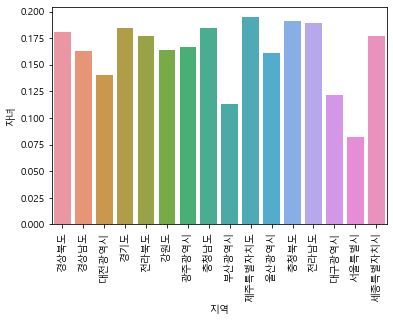

In [7]:
sns.barplot(x="지역", y="자녀", data=ag)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

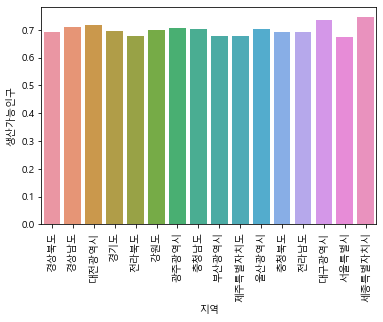

In [8]:
sns.barplot(x="지역", y='생산가능인구', data=ag)
plt.xticks(rotation=90)

#### 원데이터에 결합

In [9]:
# 숫자매핑 전
region = ag.지역.unique()
print(region)

['경상북도' '경상남도' '대전광역시' '경기도' '전라북도' '강원도' '광주광역시' '충청남도' '부산광역시' '제주특별자치도'
 '울산광역시' '충청북도' '전라남도' '대구광역시' '서울특별시' '세종특별자치시']


In [10]:
# 숫자매핑 후
for i in range(0,16):
    region1 = region[i]
    ag.지역 = [i if x == region1 else x for x in ag['지역']]
print(ag['지역'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
train = pd.merge(train, ag, how='left', left_on='지역', right_on='지역')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2549 entries, 0 to 2548
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2549 non-null   int64  
 1   총세대수      2549 non-null   int64  
 2   임대건물구분    2549 non-null   int64  
 3   지역        2549 non-null   int64  
 4   전용면적      2549 non-null   float64
 5   전용면적별세대수  2549 non-null   int64  
 6   공가수       2549 non-null   float64
 7   자격유형      2549 non-null   int64  
 8   임대보증금     2549 non-null   float64
 9   임대료       2549 non-null   float64
 10  지하철역수     2549 non-null   float64
 11  버스정류장수    2549 non-null   float64
 12  단지내주차면수   2549 non-null   float64
 13  공급유형      2549 non-null   object 
 14  등록차량수     2549 non-null   float64
 15  자녀        2549 non-null   float64
 16  생산가능인구    2549 non-null   float64
dtypes: float64(10), int64(6), object(1)
memory usage: 358.5+ KB


---

### 교통사고 발생수 

- 광역 지자체 데이터 
http://taas.koroad.or.kr/sta/acs/gus/selectTrnsportCndTfcacdSttus.do?menuId=WEB_KMP_OVT_MVT_TAC_TCT

- 시군구별 데이터 
http://taas.koroad.or.kr/sta/acs/gus/selectSignguTfcacd.do?menuId=WEB_KMP_OVT_MVT_TAG_SGT

In [13]:
acci = pd.read_excel("2020년 광역지자체 교통사고 현황.xlsx")

In [14]:
acci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역          17 non-null     object
 1   자동차등록대수(대)  17 non-null     int64 
 2   인구수(명)      17 non-null     int64 
 3   도로연장(명)     17 non-null     int64 
 4   사고건수(건)     17 non-null     int64 
 5   사망자수(명)     17 non-null     int64 
 6   부상자수(명)     17 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.1+ KB


In [15]:
acci.head()

,지역,자동차등록대수(대),인구수(명),도로연장(명),사고건수(건),사망자수(명),부상자수(명)
0,서울,3616611,9601693,8317,219162,219,329977
1,부산,1570841,3343528,3402,72480,100,113294
2,경기,6523113,13405223,14687,314722,612,518097
3,강원,943333,1515112,9915,36186,133,65936
4,충북,1028394,1631549,6898,34524,171,60804


In [16]:
acci['지역'].unique()

array(['서울', '부산', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주',
       '대구', '인천', '광주', '대전', '울산', '세종'], dtype=object)

In [17]:
# 라벨 동일하게 변경 
acci.지역[(acci['지역'] == '서울')] = '서울특별시'
acci.지역[(acci['지역'] == '부산')] = '부산광역시'
acci.지역[(acci['지역'] == '경기')] = '경기도'
acci.지역[(acci['지역'] == '강원')] = '강원도'
acci.지역[(acci['지역'] == '충북')] = '충청북도'
acci.지역[(acci['지역'] == '충남')] = '충청남도'
acci.지역[(acci['지역'] == '전북')] = '전라북도'
acci.지역[(acci['지역'] == '전남')] = '전라남도'
acci.지역[(acci['지역'] == '경북')] = '경상북도'
acci.지역[(acci['지역'] == '경남')] = '경상남도'
acci.지역[(acci['지역'] == '제주')] = '제주특별자치도'
acci.지역[(acci['지역'] == '대구')] = '대구광역시'
acci.지역[(acci['지역'] == '광주')] = '광주광역시'
acci.지역[(acci['지역'] == '대전')] = '대전광역시'
acci.지역[(acci['지역'] == '울산')] = '울산광역시'
acci.지역[(acci['지역'] == '세종')] = '세종특별자치시'

idx = acci[acci['지역']=='인천'].index
acci = acci.drop(idx)

<ipython-input-17-de3a811f01ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acci.지역[(acci['지역'] == '서울')] = '서울특별시'
<ipython-input-17-de3a811f01ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acci.지역[(acci['지역'] == '부산')] = '부산광역시'
<ipython-input-17-de3a811f01ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acci.지역[(acci['지역'] == '경기')] = '경기도'
<ipython-input-17-de3a811f01ff>:5: SettingWithCopyWarning: 
A value is trying 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

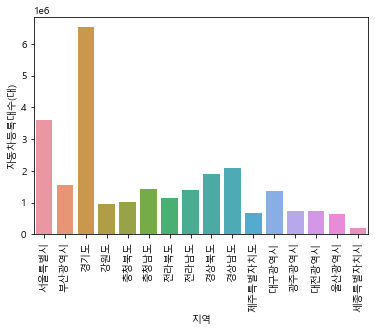

In [18]:
sns.barplot(x="지역", y="자동차등록대수(대)", data=acci)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

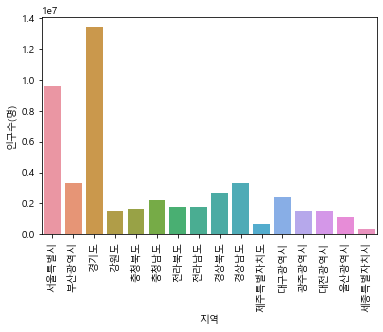

In [19]:
sns.barplot(x="지역", y="인구수(명)", data=acci)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

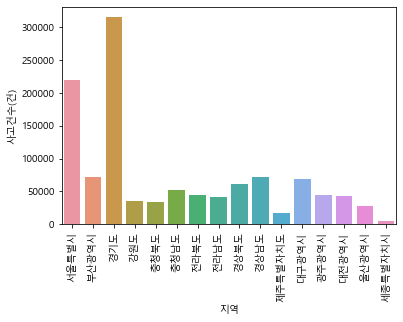

In [20]:
sns.barplot(x="지역", y="사고건수(건)", data=acci)
plt.xticks(rotation=90)

#### 원데이터에 결합

In [21]:
# 숫자매핑 전
acci['지역'].unique()

array(['서울특별시', '부산광역시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도', '대구광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시'], dtype=object)

In [22]:
# 숫자매핑 후 
for i in range(0,16):
    region1 = region[i]
    acci.지역 = [i if x == region1 else x for x in acci['지역']]
print(acci['지역'].unique())

[14  8  3  5 11  7  4 12  0  1  9 13  6  2 10 15]


In [23]:
train = pd.merge(train, acci, how='left', left_on='지역', right_on='지역')

In [24]:
train

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,공급유형,등록차량수,자녀,생산가능인구,자동차등록대수(대),인구수(명),도로연장(명),사고건수(건),사망자수(명),부상자수(명)
0,246,545,0,2,33.48,276,17.0,14,9216000.0,82940.0,...,국민임대,205.0,0.140571,0.716473,728487,1500215,2146,42712,66,72467
1,246,545,0,2,39.60,60,17.0,14,12672000.0,107130.0,...,국민임대,205.0,0.140571,0.716473,728487,1500215,2146,42712,66,72467
2,246,545,0,2,39.60,20,17.0,14,12672000.0,107130.0,...,국민임대,205.0,0.140571,0.716473,728487,1500215,2146,42712,66,72467
3,246,545,0,2,46.90,38,17.0,14,18433000.0,149760.0,...,국민임대,205.0,0.140571,0.716473,728487,1500215,2146,42712,66,72467
4,246,545,0,2,46.90,19,17.0,14,18433000.0,149760.0,...,국민임대,205.0,0.140571,0.716473,728487,1500215,2146,42712,66,72467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,57,697,1,7,31.84,1,0.0,1,7854182.0,166698.5,...,임대상가,86.0,0.184579,0.701710,1424208,2204431,7612,52541,261,94293
2545,57,697,1,7,63.68,1,0.0,1,35836620.0,218783.5,...,임대상가,86.0,0.184579,0.701710,1424208,2204431,7612,52541,261,94293
2546,57,697,1,7,137.49,1,0.0,1,48819160.0,263131.5,...,임대상가,86.0,0.184579,0.701710,1424208,2204431,7612,52541,261,94293
2547,63,481,1,2,31.84,1,5.0,1,7925370.0,150289.3,...,임대상가,62.0,0.140571,0.716473,728487,1500215,2146,42712,66,72467


In [25]:
# train = train.drop(['도로연장(명)', '사망자수(명)', '부상자수(명)'], axis='columns')

## 상관관계확인 

In [26]:
train.head()

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,공급유형,등록차량수,자녀,생산가능인구,자동차등록대수(대),인구수(명),도로연장(명),사고건수(건),사망자수(명),부상자수(명)
0,246,545,0,2,33.48,276,17.0,14,9216000.0,82940.0,...,국민임대,205.0,0.140571,0.716473,728487,1500215,2146,42712,66,72467
1,246,545,0,2,39.60,60,17.0,14,12672000.0,107130.0,...,국민임대,205.0,0.140571,0.716473,728487,1500215,2146,42712,66,72467
2,246,545,0,2,39.60,20,17.0,14,12672000.0,107130.0,...,국민임대,205.0,0.140571,0.716473,728487,1500215,2146,42712,66,72467
3,246,545,0,2,46.90,38,17.0,14,18433000.0,149760.0,...,국민임대,205.0,0.140571,0.716473,728487,1500215,2146,42712,66,72467
4,246,545,0,2,46.90,19,17.0,14,18433000.0,149760.0,...,국민임대,205.0,0.140571,0.716473,728487,1500215,2146,42712,66,72467


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


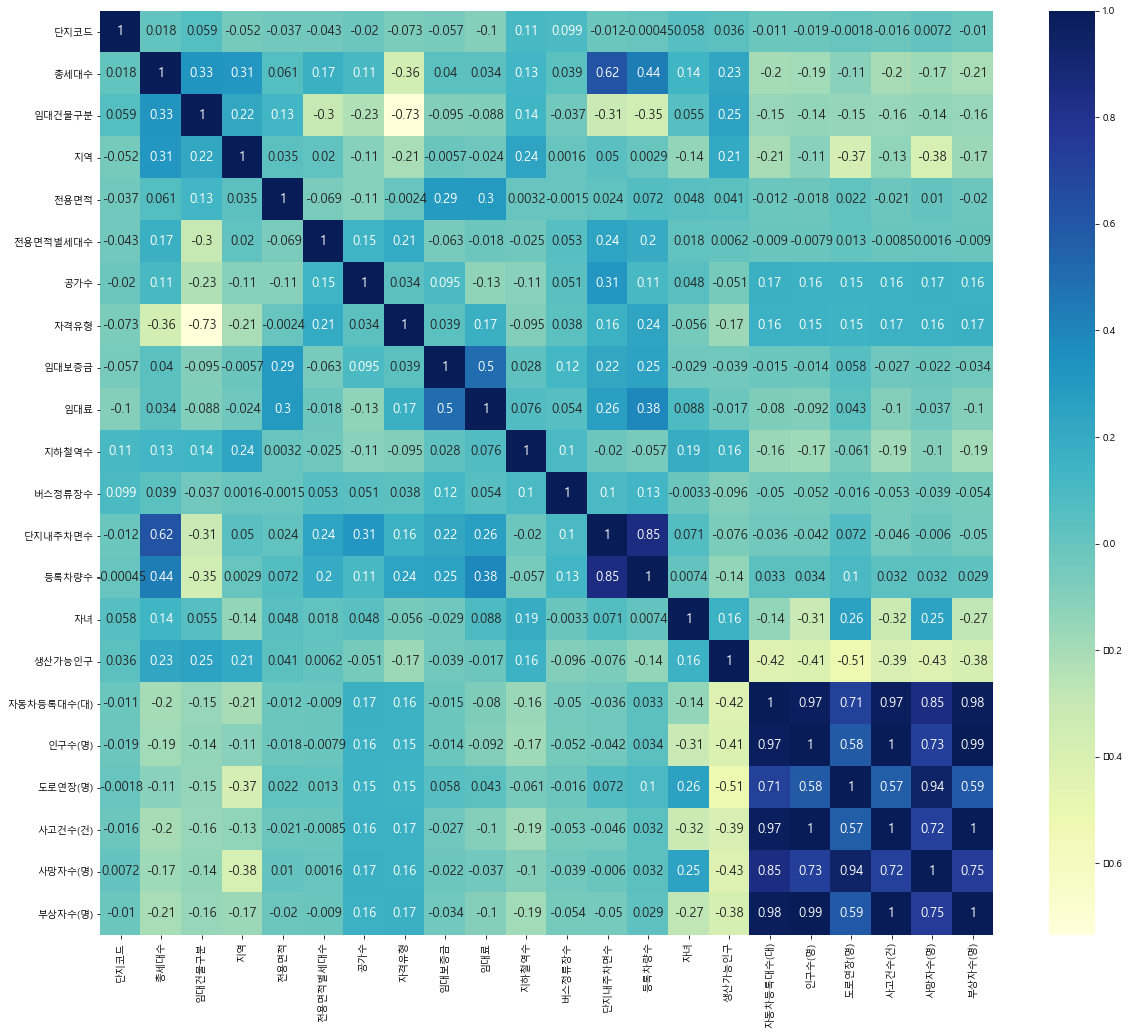

In [27]:
plt.figure(figsize=(20,17))
sns.heatmap(train.corr(), cbar=True, annot=True, annot_kws = {'size' : 13}, cmap='YlGnBu')
plt.show()